In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
left_distance = ctrl.Antecedent(np.arange(0, 101, 1), 'left_distance')
right_distance = ctrl.Antecedent(np.arange(0, 101, 1), 'right_distance')

# Output variables
acceleration = ctrl.Consequent(np.arange(-10, 20, 1), 'acceleration')
steering_angle = ctrl.Consequent(np.arange(-45, 46, 1), 'steering_angle')

# Membership functions for input variables
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 40])
distance['moderate'] = fuzz.trimf(distance.universe, [20, 50, 80])
distance['far'] = fuzz.trimf(distance.universe, [40, 100, 100])

speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['moderate'] = fuzz.trimf(speed.universe, [20, 50, 80])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])

left_distance['close'] = fuzz.trimf(left_distance.universe, [0, 0, 50])
left_distance['moderate'] = fuzz.trimf(left_distance.universe, [20, 50, 80])
left_distance['far'] = fuzz.trimf(left_distance.universe, [50, 100, 100])

right_distance['close'] = fuzz.trimf(right_distance.universe, [0, 0, 50])
right_distance['moderate'] = fuzz.trimf(right_distance.universe, [20, 50, 80])
right_distance['far'] = fuzz.trimf(right_distance.universe, [50, 100, 100])



# Membership functions for output variables
acceleration['brake_hard'] = fuzz.trimf(acceleration.universe, [-10, -10, -5])
acceleration['brake_lightly'] = fuzz.trimf(acceleration.universe, [-10, -5, 0])
acceleration['maintain'] = fuzz.trimf(acceleration.universe, [-5, 0, 5])
acceleration['accelerate_lightly'] = fuzz.trimf(acceleration.universe, [0, 5, 10])
acceleration['accelerate_hard'] = fuzz.trimf(acceleration.universe, [5, 10, 10])

steering_angle['sharp_left'] = fuzz.trimf(steering_angle.universe, [-45, -45, -22.5])
steering_angle['left'] = fuzz.trimf(steering_angle.universe, [-30, -22.5, -7.5])
steering_angle['straight'] = fuzz.trimf(steering_angle.universe, [-15, 0, 15])
steering_angle['right'] = fuzz.trimf(steering_angle.universe, [7.5, 22.5, 30])
steering_angle['sharp_right'] = fuzz.trimf(steering_angle.universe, [22.5, 45, 45])

# Rules for acceleration
rule1 = ctrl.Rule(distance['far'] & speed['slow'], acceleration['accelerate_hard'])
rule2 = ctrl.Rule(distance['moderate'] & speed['slow'], acceleration['maintain'])
rule3 = ctrl.Rule(distance['close'] & speed['slow'], acceleration['brake_lightly'])
rule4 = ctrl.Rule(distance['far'] & speed['moderate'], acceleration['accelerate_lightly'])
rule5 = ctrl.Rule(distance['moderate'] & speed['moderate'], acceleration['maintain'])
rule6 = ctrl.Rule(distance['close'] & speed['moderate'], acceleration['brake_hard'])
rule7 = ctrl.Rule(distance['far'] & speed['fast'], acceleration['accelerate_lightly'])
rule8 = ctrl.Rule(distance['moderate'] & speed['fast'], acceleration['brake_lightly'])
rule9 = ctrl.Rule(distance['close'] & speed['fast'], acceleration['brake_hard'])

# Rules for steering angle
rule10 = ctrl.Rule(left_distance['far'] & right_distance['far'], steering_angle['straight'])
rule11 = ctrl.Rule(left_distance['far'] & right_distance['moderate'], steering_angle['left'])
rule12 = ctrl.Rule(left_distance['far'] & right_distance['close'], steering_angle['sharp_left'])
rule13 = ctrl.Rule(left_distance['moderate'] & right_distance['far'], steering_angle['right'])
rule14 = ctrl.Rule(left_distance['moderate'] & right_distance['moderate'], steering_angle['straight'])
rule15 = ctrl.Rule(left_distance['moderate'] & right_distance['close'], steering_angle['left'])
rule16 = ctrl.Rule(left_distance['close'] & right_distance['far'], steering_angle['sharp_right'])
rule17 = ctrl.Rule(left_distance['close'] & right_distance['moderate'], steering_angle['right'])
rule18 = ctrl.Rule(left_distance['close'] & right_distance['close'], steering_angle['straight'])

# Control System
car_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                               rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18])
car_simulation = ctrl.ControlSystemSimulation(car_ctrl)

# Input data (distance, speed, left_distance, right_distance)
car_simulation.input['distance'] = 35
car_simulation.input['speed'] = 65
car_simulation.input['left_distance'] = 40
car_simulation.input['right_distance'] = 50

# Compute the result
car_simulation.compute()

# Output data (acceleration, steering_angle)
acceleration_result = car_simulation.output['acceleration']
steering_angle_result = car_simulation.output['steering_angle']

print("Acceleration:", acceleration_result)
print("Steering Angle:", steering_angle_result)

Acceleration: -2.0265417642466823
Steering Angle: 4.081395348837211


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


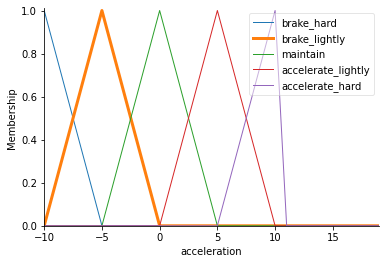

In [2]:
acceleration['brake_lightly'].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


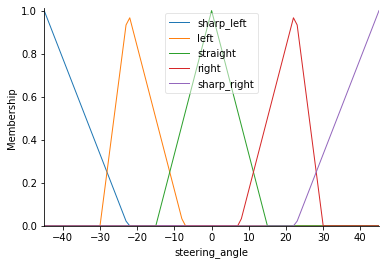

In [3]:
steering_angle.view()